In [7]:
import CMF
import PyPlot; plt = PyPlot;
import Random; Random.seed!(0);
import JLD

## Generate synthetic datasets

We wish to better understand the performance of each algorithm for varying sizes of $T$. 
Since some audio and neuroscience datasets may span long timeframes, fast algorithms for large datasets are necessary to usefully apply the convolutive NMF model.

In these figures, we fix the number of rows (neurons) in $X$ to be `N=250`, and vary the number of columns (timebins) across 4 values: `T=500, T=2500, T=10000, T=50000`.

In [2]:
N = 250
K, L = 3, 20
alpha, p_h, sigma, noise_scale = 0.1, 0.5, 0.2, 1.0

T_list = [500, 2500, 10_000, 50_000]

data_list = Dict()

for T in T_list
    data, trueW, trueH = CMF.synthetic_sequences(
        K=K, N=N, L=L, T=T,
        alpha=0.1, p_h=0.5, sigma=0.2, noise_scale=1.0
    )
    data_list[T] = (data, trueW, trueH)
end

## Fit data

In [3]:
alg_list = [:hals, :mult, :anls]

results = Dict()
for key in keys(data_list)
    results[key] = Dict()
    
    for alg in alg_list
        results[key][alg] = CMF.fit_cnmf(
            data_list[key][1],
            alg=alg, K=K, L=L, max_time=60, max_itr=Inf
        )
    end
end

In [8]:
JLD.save("./synthetic_comparison.jld", "results", results)

## Plot loss histories

In [ ]:
results = JLD.load("./synthetic_comparison.ipynbnthetic_comparison.jld", "results")

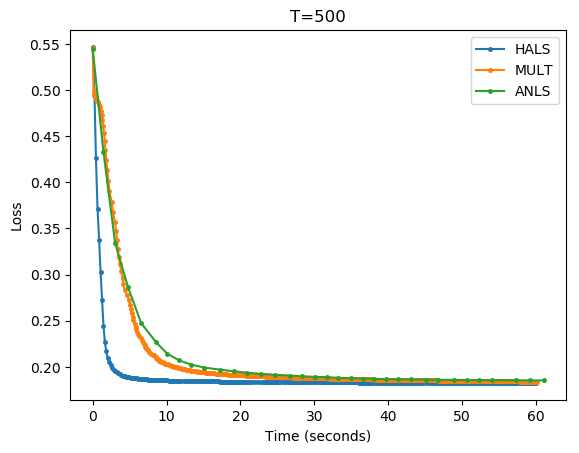

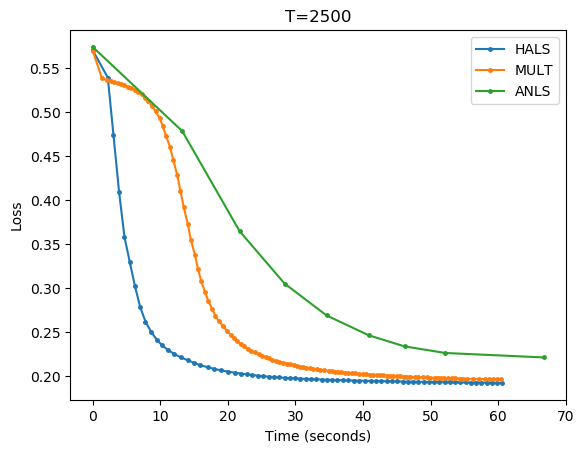

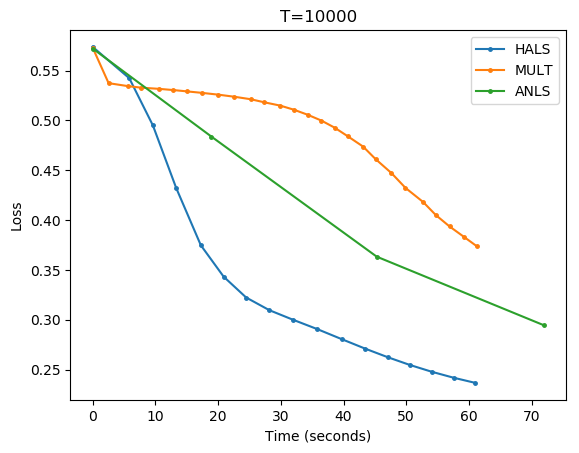

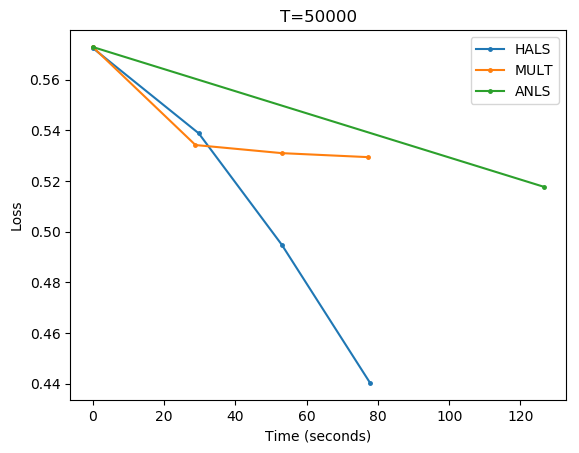

In [5]:
labels = Dict(:hals => "HALS", :mult => "MULT", :anls => "ANLS")

for T in T_list
    plt.figure()
    for alg in alg_list
        r = results[T][alg]
        plt.plot(r.time_hist, r.loss_hist, marker=".", markersize=5,
            label=labels[alg])
    end
    plt.legend()
    plt.title(string("T=", T))
    plt.xlabel("Time (seconds)")
    plt.ylabel("Loss")
    plt.show()
end